In [49]:
using HarmonicBalance
HarmonicBalance.default(size=(380,270))
@variables ω0, γ, λ, F, x, θ, η, α, ω, t, x(t)

eq =  d(d(x,t),t) + γ*d(x,t) + ω0^2*(1-λ*cos(2*ω*t))*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t+θ)

diff_eq = DifferentialEquation(eq, x)
add_harmonic!(diff_eq, x, ω); # single-frequency ansatz

# construct the harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq);

In [50]:
import HarmonicBalance.TimeEvolution: ODEProblem, DifferentialEquations.solve

x0 = [0.0; 0.] # initial condition
fixed = (ω0 => 1.0,γ => 1E-2, λ => 5E-2, F => 1E-3,  α => 1., η=>0.3, θ => 0, ω=>1.) # parameter values

ode_problem = ODEProblem(harmonic_eq, fixed, x0 = x0, timespan = (0,1000))

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 1000)
u0: 2-element Vector{Float64}:
 0.0
 0.0

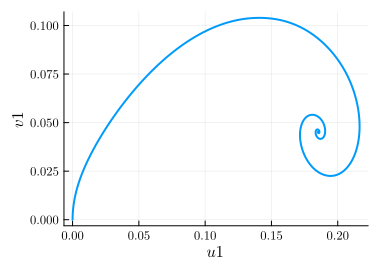

In [51]:
time_evo = solve(ode_problem, saveat=1.);
plot(time_evo, ["u1", "v1"], harmonic_eq)


In [52]:
using LaTeXStrings

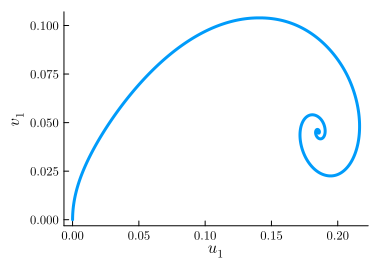

In [53]:
#Plotting settings can be readily altered by passing keyword arguments
plot(time_evo, ["u1", "v1"], harmonic_eq,lw=3,xlabel=L"$u_1$",ylabel=L"$v_1$",grid=false)

In [54]:
savefig("figs/time_dependent/evo_to_steady.png")

In [55]:
# steady state diagram 
varied = ω => LinRange(0.9, 1.1, 150)
result = get_steady_states(harmonic_eq, varied, fixed);

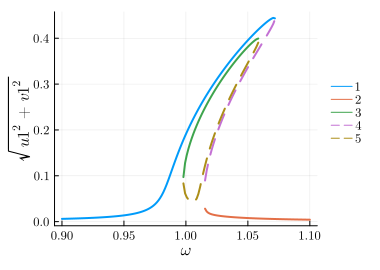

In [56]:
plot(result, "sqrt(u1^2 + v1^2)",foreground_color_legend = nothing)


In [57]:
savefig("figs/time_dependent/steady.png")

### parameter sweeps

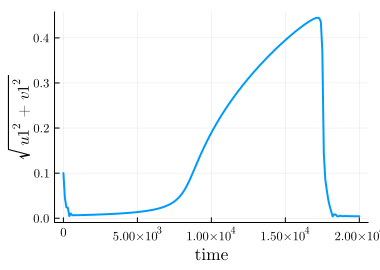

In [58]:
sweep = ParameterSweep(ω => (0.9,1.1), (0, 2E4))

ode_problem = ODEProblem(harmonic_eq, fixed, sweep=sweep, x0=[0.1;0.0], timespan=(0, 2E4))
time_evo = solve(ode_problem, saveat=100)
plot(time_evo, "sqrt(u1^2 + v1^2)", harmonic_eq)

In [59]:
savefig("figs/time_dependent/sweep_omega.png")